# Ikeda map  
https://en.wikipedia.org/wiki/Ikeda_map  

Support from chatgpt  
https://chatgpt.com/c/68a53772-74d0-8325-b846-ab196f4f88ff  

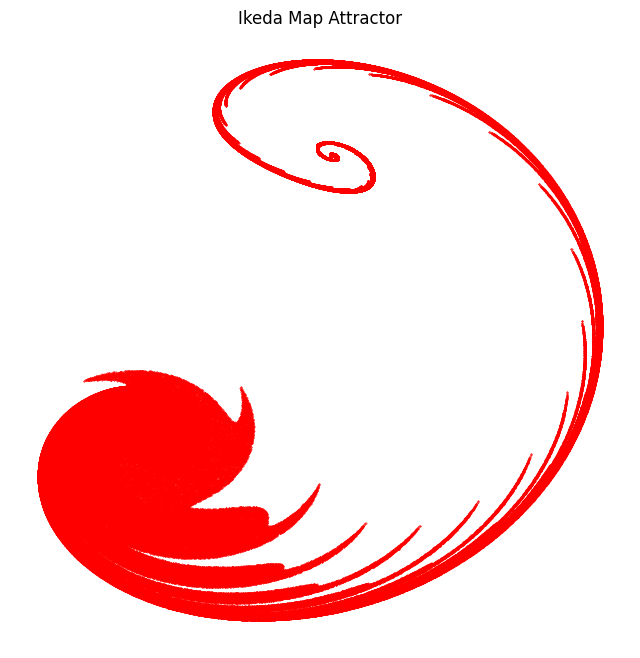

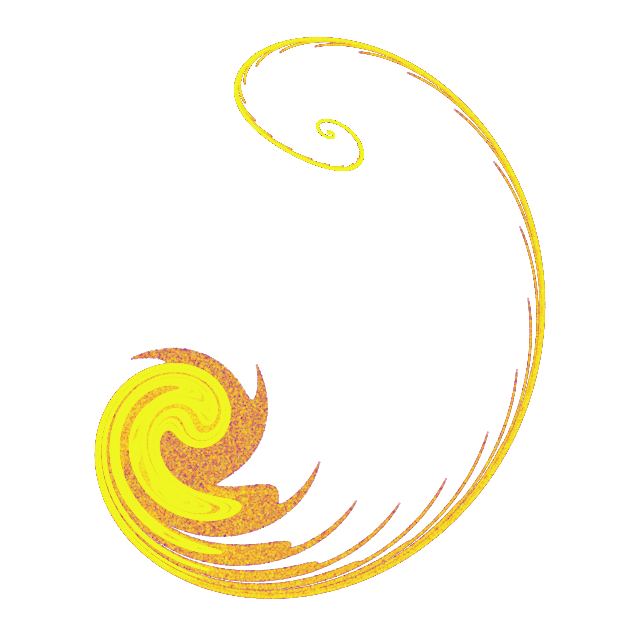

In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt

# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

#ikeda map parameter
u = 0.9
k = 0.4
p = 6.0

#trajectories parameter
points = 50000   #the number of parallel trajectories = the number of initial points
steps = 100      #the number of iterative steps for each trajectory

#initialize the random starting point
x = 2 * torch.rand(points, device=device) - 1 #random number range [-1, 1]
y = 2 * torch.rand(points, device=device) - 1

#store the trajectories
track_x = torch.zeros(points, steps, device=device)
track_y = torch.zeros(points, steps, device=device)

for n in range(steps):
    t = k - p / (1 + x**2 + y**2)
    x_ = 1 + u * (x * torch.cos(t) - y * torch.sin(t))
    y_ = u * (x * torch.sin(t) + y * torch.cos(t))
    #update
    x, y = x_, y_
    #store
    track_x[:, n] = x
    track_y[:, n] = y

# plot
plt.figure(figsize=(8,8))
plt.scatter(track_x.cpu().flatten().numpy(), track_y.cpu().flatten().numpy(), s=0.1, color='red')
plt.axis('off')
plt.title("Ikeda Map Attractor")
plt.show()

# Create color gradient based on iteration step
# Repeat step indices for each trajectory
colors = torch.arange(steps).unsqueeze(1).repeat(1, points).flatten()
colors = colors / colors.max()  # normalize to [0,1] for colormap

plt.figure(figsize=(8,8))
plt.scatter(track_x.cpu().flatten().numpy(), track_y.cpu().flatten().numpy(), c=colors, cmap='plasma', s=0.1, marker='.')
plt.axis('equal')
plt.axis('off')
plt.show()

I gave chatgpt the code above  
and ask it to generate code to look at the fractal dimension  
https://chatgpt.com/c/68a5514b-318c-8326-8e16-9ff57ed9185b  

Estimated fractal (box-counting) dimension: 1.759


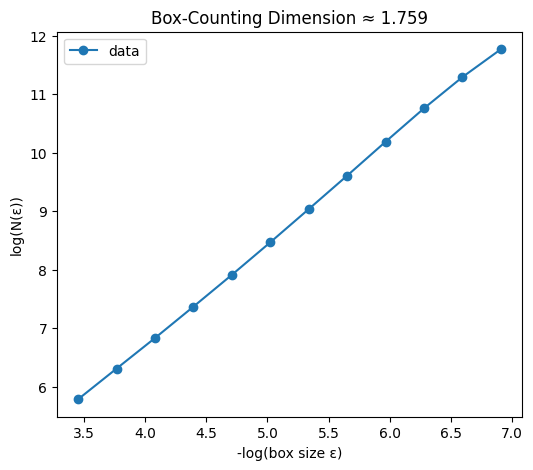

In [23]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Ikeda map parameters
u = 0.9
k = 0.4
p = 6.0

# trajectories parameters
points = 50000
steps = 100

# initialize random starting points
x = 2 * torch.rand(points, device=device) - 1
y = 2 * torch.rand(points, device=device) - 1

# store trajectories
track_x = torch.zeros(points, steps, device=device)
track_y = torch.zeros(points, steps, device=device)

for n in range(steps):
    t = k - p / (1 + x**2 + y**2)
    x_ = 1 + u * (x * torch.cos(t) - y * torch.sin(t))
    y_ = u * (x * torch.sin(t) + y * torch.cos(t))
    x, y = x_, y_
    track_x[:, n] = x
    track_y[:, n] = y

# convert to numpy for box-counting
points_np = np.vstack([track_x.flatten().cpu().numpy(),
                       track_y.flatten().cpu().numpy()]).T

# --- Box-counting dimension ---
def box_counting_dimension(points, n_scales=10):
    # normalize points into [0,1]x[0,1]
    min_vals = points.min(axis=0)
    max_vals = points.max(axis=0)
    norm_points = (points - min_vals) / (max_vals - min_vals + 1e-12)

    sizes = np.logspace(-1.5, -3, n_scales)  # box sizes
    Ns = []

    for eps in sizes:
        # map points to grid
        bins = np.floor(norm_points / eps).astype(int)
        # unique boxes visited
        boxes = np.unique(bins, axis=0)
        Ns.append(len(boxes))

    # fit line log(N) vs log(1/eps)
    X = -np.log(sizes).reshape(-1, 1)
    y = np.log(Ns)
    reg = LinearRegression().fit(X, y)
    dim = reg.coef_[0]

    return sizes, Ns, dim

sizes, Ns, dim = box_counting_dimension(points_np, n_scales=12)

print(f"Estimated fractal (box-counting) dimension: {dim:.3f}")

# plot log-log
plt.figure(figsize=(6,5))
plt.plot(-np.log(sizes), np.log(Ns), 'o-', label='data')
plt.xlabel("-log(box size ε)")
plt.ylabel("log(N(ε))")
plt.title(f"Box-Counting Dimension ≈ {dim:.3f}")
plt.legend()
plt.show()
